# Figure 1, Panels C/D

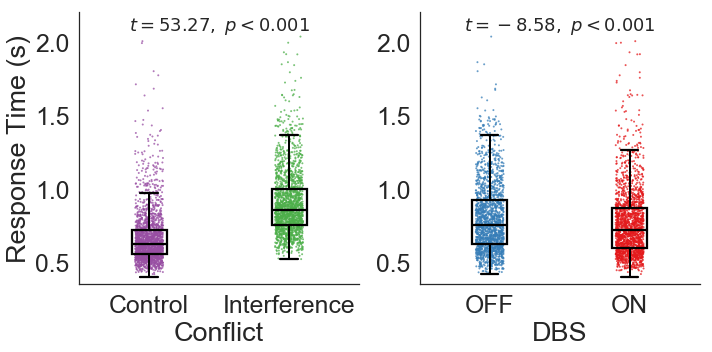

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
sns.set_style('white')
sns.set_context('notebook', font_scale=2.25)
%matplotlib inline

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and preprocess data. 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load data.
df = read_csv('behavior/EMOTE_behav_data.csv')

## Prepare data.
df.DBS = np.where(df.DBS,'ON','OFF')
df.interference = np.where(df.interference, 'Interference', 'Control')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Interference effect.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

fig, axes = plt.subplots(1,2,figsize=(10,5))

## Define metadata.
x, y = 'interference', 'origResponseTimes'
order = ['Control','Interference']
palette = ['#984EA3','#4DAF4A']

## Point plot.
sns.stripplot(x, y, data=df, order=order, palette=palette, edgecolor='none', 
              alpha=0.75, size=2, zorder=0, ax=axes[0])

## Boxplot overlay.
sns.boxplot(x, y, data=df, order=order, color='k', zorder=10, showcaps=True,
            width=0.25, linewidth=2.25, boxprops={'facecolor':'none', "zorder":10},
            showfliers=False, whiskerprops={'linewidth':2, "zorder":10},
            saturation=1, ax=axes[0])

## Add details. Clean up.
axes[0].set(xlabel='Conflict', ylim=(0.35, 2.2), ylabel='Response Time (s)')
axes[0].annotate(r'$t = 53.27,\ p < 0.001$', (0,0), (0.5,0.95), 'axes fraction',
                 va='center', ha='center', fontsize=18)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### DBS effect.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define metadata.
x, y = 'DBS', 'origResponseTimes'
order = ['OFF','ON']
palette = ['#377EB8','#E41A1C']

## Point plot.
sns.stripplot(x, y, data=df, order=order, palette=palette, edgecolor='none', 
              alpha=0.75, size=2, zorder=0, ax=axes[1])

## Boxplot overlay.
sns.boxplot(x, y, data=df, order=order, color='k', zorder=10, showcaps=True,
            width=0.25, linewidth=2.25, boxprops={'facecolor':'none', "zorder":10},
            showfliers=False, whiskerprops={'linewidth':2, "zorder":10},
            saturation=1, ax=axes[1])
    
## Add details / clean up.
axes[1].set(xlabel='DBS', ylim=(0.35, 2.2), ylabel='')
axes[1].annotate(r'$t = -8.58,\ p < 0.001$', (0,0), (0.5,0.95), 'axes fraction',
                 va='center', ha='center', fontsize=18)
    
sns.despine()
plt.tight_layout()
plt.savefig('plots/natcomm/fig1cd.png', dpi=180)
plt.savefig('plots/natcomm/fig1cd.svg', dpi=180)

# Figure 2, Panels B/C
N=9 (BRTU, CHDR, CRDA, JASE, KARA, M5, MEMU, MEWA, S2)

5 (0.006%) trials marked for removal.


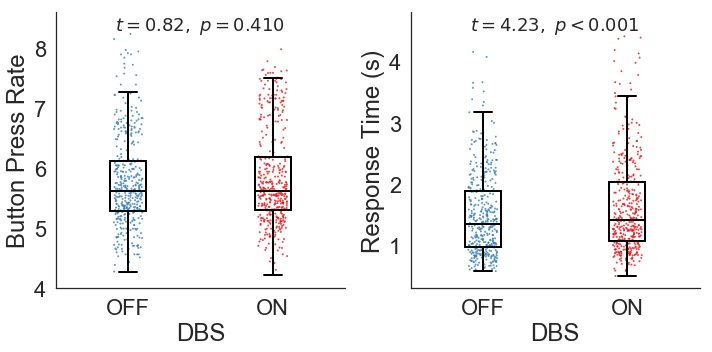

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
from scipy.stats import gamma
sns.set_style('white')
sns.set_context('notebook', font_scale=2)
%matplotlib inline

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define fast RT threshold (seconds).
## All reaction times faster than this threshold will
## be counted as artifactual and removed from the data.
thresh_fast = 0.4

## Define slow RT threshold (CDF).
## All reaction times with a gamma cumulative density
## value greater than this threshold will be counted
## as artifactual and removed from the data.
thresh_slow = 0.9999

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and prepare data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load data.
data = read_csv('behavior/clean_eefrt_behavior.csv')
data = data[['Subject','TrialNo','DBS','RM_Hard','Probability','Choice','ChoiceRT',
             'CompletionTime','ButtonPressRate','Completed']]
data.columns = ['Subject','Trial','DBS','Reward','Probability','Choice','RT','CT','BPR','Completed']
data['DBS'] = np.where(data.DBS, 'ON', 'OFF')

## Identify and remove missing data.
data = data.dropna()

## Identify fast reaction times.
data['FastRT'] = data['RT'] < thresh_fast

## Fit gamma distributions to each participant.
params = []
data['gammaCDF'] = 0
for subject in data.Subject.unique():
    
    ## Extract reaction times.
    ix = np.logical_and(data.Subject==subject, data.FastRT==False)
    RT = data.loc[ix,'RT'].values
    
    ## Fit gamma.
    params.append( gamma.fit(RT, floc=0) )
    data.loc[ix,'gammaCDF'] = gamma(*params[-1]).cdf(RT)

## Identify slow reaction times.
data['SlowRT'] = data['gammaCDF'] > thresh_slow

## Identify outliers.
data['Outlier'] = np.logical_or(data.FastRT, data.SlowRT)
print('%s (%0.3f%%) trials marked for removal.' %(data.Outlier.sum(), data.Outlier.mean()))

## Save out for analysis.
data['zReward'] = data.groupby('Subject').Reward.apply(lambda arr: (arr - arr.mean()) / arr.std() )
data['zProb'] = data.groupby('Subject').Probability.apply(lambda arr: (arr - arr.mean()) / arr.std() )
data.to_csv('~/Desktop/data.csv', index=False)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Button press rates
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

fig, axes = plt.subplots(1,2,figsize=(10,5))

## Define metadata.
x, y = 'DBS', 'BPR'
order = ['OFF','ON']
palette = ['#377EB8','#E41A1C']

## Point plot.
sns.stripplot(x, y, data=data, order=order, palette=palette, edgecolor='none', 
              alpha=0.8, size=2, zorder=0, ax=axes[0])

## Boxplot overlay.
sns.boxplot(x, y, data=data, order=order, color='k', zorder=10, showcaps=True,
            width=0.25, linewidth=2, boxprops={'facecolor':'none', "zorder":10},
            showfliers=False, whiskerprops={'linewidth':2, "zorder":10},
            saturation=1, ax=axes[0])

## Add details. Clean up.
axes[0].set(xlabel='DBS', ylabel='Button Press Rate', ylim=(4,8.6))
axes[0].annotate(r'$t =  0.82,\ p = 0.410$', (0,0), (0.5,0.95), 'axes fraction',
                 va='center', ha='center', fontsize=18)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Reaction Times.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define metadata.
x, y = 'DBS', 'RT'
order = ['OFF','ON']
palette = ['#377EB8','#E41A1C']

## Point plot.
sns.stripplot(x, y, data=data[~data.Outlier], order=order, palette=palette, edgecolor='none', 
              alpha=0.8, size=2, zorder=0, ax=axes[1])

## Boxplot overlay.
sns.boxplot(x, y, data=data[~data.Outlier], order=order, color='k', zorder=10, showcaps=True,
            width=0.25, linewidth=2, boxprops={'facecolor':'none', "zorder":10},
            showfliers=False, whiskerprops={'linewidth':2, "zorder":10},
            saturation=1, ax=axes[1])

## Add details. Clean up.
axes[1].set(xlabel='DBS', ylabel='Response Time (s)', ylim=(0.3, 4.8))
axes[1].annotate(r'$t =  4.23,\ p < 0.001$', (0,0), (0.5,0.95), 'axes fraction',
                 va='center', ha='center', fontsize=18)

sns.despine()
plt.tight_layout()
plt.savefig('plots/natcomm/fig2bc.png', dpi=180)
plt.savefig('plots/natcomm/fig2bc.svg', dpi=180)

## R mixed effects regression code

Completion time (as cleaner proxy of button press rate):

> DBS b=5.982e-04 se= 7.259e-04 t=0.824 p=0.410    

Reaction time:

> DBS b=0.048582 se=0.011481 t=4.231 p=2.32e-05 ***


# Figure 3, Panels e/f

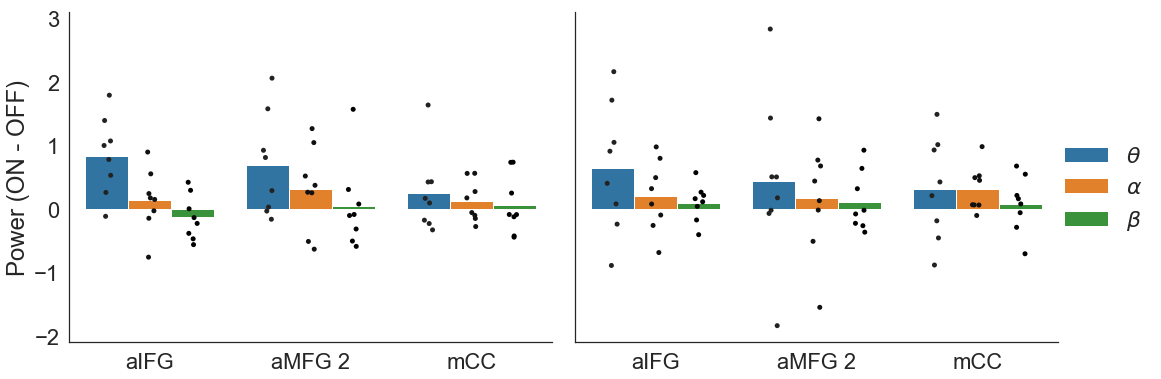

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, concat, read_csv
sns.set_style('white')
sns.set_context('notebook', font_scale=2)
%matplotlib inline

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## I/O parameters
space = 'source'
model_name = 'revised'
contrast = 'DBS'

## Label parameters.
labels = ['dlpfc_5-lh', 'dlpfc_4-lh', 'pcc-lh']
xlabels = ['aIFG', 'aMFG 2', 'mCC']

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

tmp = []
for analysis in ['stim','resp']:
        
    for label, xlabel in zip(labels,xlabels):
    
        for freq, ffreq in zip(['theta','alpha','beta'],
                               [r'$\theta$',r'$\alpha$',r'$\beta$']):
    
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            ### Load data.
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            
            ## Load trial information
            info = read_csv(os.path.join(space, 'afMSIT_%s_info.csv' %space))

            ## Load source data.
            npz = np.load(os.path.join(space, 'afMSIT_%s_%s_%s_%s.npz' %(space,analysis,label,freq)))
            data = npz['data']
            times = npz['times']

            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            ### Compute differences.
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

            ## Define time mask.
            if analysis == 'stim': tmin, tmax = 0.4, 0.8
            elif analysis == 'resp': tmin, tmax = -0.2, 0.2
            time_ix, = np.where(np.logical_and(times >= tmin, times <= tmax)) 

            ## Convert to DataFrame.
            df = DataFrame(data[:,time_ix])
            df['Subject'] = info.Subject
            df['DBS'] = info.DBS
            
            ## Compute average power difference within subject/DBS.
            df = df.melt(id_vars=['Subject','DBS'], var_name='Time', value_name='Power')
            df = df.groupby(['DBS','Subject','Time']).Power.mean()
            df = (df[1] - df[0]).reset_index()
            df = df.groupby('Subject').Power.mean()
            
            ## Add metadata.
            df = DataFrame(df).reset_index()
            df['Analysis'] = analysis
            df['Frequency'] = ffreq
            df['ROI'] = xlabel
            tmp.append(df)
            
## Concatenate data.
data = concat(tmp)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define plotting info.
x, y, hue = 'ROI', 'Power', 'Frequency'
order = ['aIFG', 'aMFG 2', 'mCC']
hue_order = [r'$\theta$',r'$\alpha$',r'$\beta$']
palette = sns.color_palette(n_colors=3)

## Initialize canvas.
g = sns.FacetGrid(data, col='Analysis', hue_order=hue_order, height=6, aspect=1.25, palette=palette)

## Draw barplot.
g.map(sns.barplot, x, y, hue, order=order, hue_order=hue_order, palette=palette, alpha=1, ci=None)

## Draw individual datapoints.
g.map(sns.stripplot, x, y, hue, order=order, hue_order=hue_order, dodge=True, color='k')

## Update plots.
g.set_xlabels('')
g.set_ylabels('Power (ON - OFF)')
g.set_titles('')
g.add_legend()

plt.savefig('plots/natcomm/fig3ef.png', dpi=180)
plt.savefig('plots/natcomm/fig3ef.svg', dpi=180)

# Figure S1d

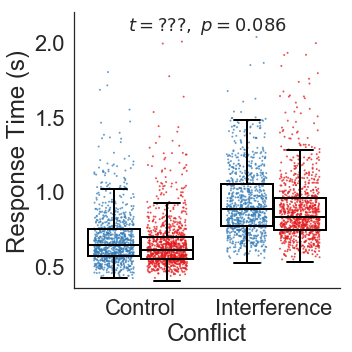

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
sns.set_style('white')
sns.set_context('notebook', font_scale=2)
%matplotlib inline

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and preprocess data. 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load data.
df = read_csv('behavior/EMOTE_behav_data.csv')

## Prepare data.
df.DBS = np.where(df.DBS,'ON','OFF')
df.interference = np.where(df.interference, 'Interference', 'Control')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### DBS x Interference effect.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

fig, ax = plt.subplots(1,1,figsize=(5,5))

## Define metadata.
x, y, hue = 'interference', 'origResponseTimes', 'DBS'
order = ['Control','Interference']
hue_order = ['OFF','ON']
palette = ['#377EB8','#E41A1C']

## Point plot.
sns.stripplot(x, y, hue, data=df, order=order, hue_order=hue_order, palette=palette, 
              jitter=0.3, edgecolor='none', dodge=True, alpha=0.75, size=2, zorder=0, ax=ax)

## Boxplot overlay.
sns.boxplot(x, y, hue, data=df, order=order, hue_order=hue_order, color='k', 
            zorder=10, width=0.8, linewidth=2,
            showcaps=True,  boxprops={'facecolor':'none', "zorder":10},
            showfliers=False, whiskerprops={'linewidth':2, "zorder":10},
            saturation=1, dodge=True, ax=ax)

## Add details. Clean up.
ax.set(xlabel='Conflict', ylim=(0.35, 2.2), ylabel='Response Time (s)')
ax.annotate(r'$t = ???,\ p = 0.086$', (0,0), (0.5,0.95), 'axes fraction',
            va='center', ha='center', fontsize=18)
ax.legend_.set_visible(False)

sns.despine()
plt.tight_layout()
plt.savefig('plots/natcomm/figS1d.png', dpi=180)
plt.savefig('plots/natcomm/figS1d.svg', dpi=180)

# Figure S3

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, concat, read_csv
sns.set_style('white')
sns.set_context('notebook', font_scale=2)
%matplotlib inline

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## I/O parameters
space = 'source'
model_name = 'revised'
contrast = 'DBS'

## Label parameters.
labels = ['racc-lh', 'dacc-lh', 'pcc-lh', 'dmpfc-lh', 'dlpfc_1-lh', 'dlpfc_2-lh', 
          'dlpfc_3-lh', 'dlpfc_4-lh', 'dlpfc_5-lh', 'dlpfc_6-lh', 
          'racc-rh', 'dacc-rh', 'pcc-rh', 'dmpfc-rh', 'dlpfc_1-rh', 'dlpfc_2-rh', 
          'dlpfc_3-rh', 'dlpfc_4-rh', 'dlpfc_5-rh', 'dlpfc_6-rh']
xlabels = ['rACC', 'dACC', 'mCC', 'SFG', 'pMFG 1', 'pMFG 2',
           'aMFG 1', 'aMFG 2', 'aIFG', 'pIFG'] * 2

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

tmp = []
for analysis in ['stim','resp']:
        
    for label, xlabel in zip(labels,xlabels):
    
        for freq, ffreq in zip(['theta','alpha','beta'],
                               [r'$\theta$',r'$\alpha$',r'$\beta$']):
    
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            ### Load data.
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            
            ## Load trial information
            info = read_csv(os.path.join(space, 'afMSIT_%s_info.csv' %space))

            ## Load source data.
            npz = np.load(os.path.join(space, 'afMSIT_%s_%s_%s_%s.npz' %(space,analysis,label,freq)))
            data = npz['data']
            times = npz['times']

            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            ### Compute differences.
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

            ## Define time mask.
            if analysis == 'stim': tmin, tmax = 0.4, 0.8
            elif analysis == 'resp': tmin, tmax = -0.2, 0.2
            time_ix, = np.where(np.logical_and(times >= tmin, times <= tmax)) 

            ## Convert to DataFrame.
            df = DataFrame(data[:,time_ix])
            df['Subject'] = info.Subject
            df['DBS'] = info.DBS
            
            ## Compute average power difference within subject/DBS.
            df = df.melt(id_vars=['Subject','DBS'], var_name='Time', value_name='Power')
            df = df.groupby(['DBS','Subject','Time']).Power.mean()
            df = (df[1] - df[0]).reset_index()
            df = df.groupby('Subject').Power.mean()
            
            ## Add metadata.
            df = DataFrame(df).reset_index()
            df['Analysis'] = analysis
            df['Frequency'] = ffreq
            df['ROI'] = xlabel
            df['Hemi'] = 'lh' if label.endswith('lh') else 'rh'
            tmp.append(df)
            
## Concatenate data.
data = concat(tmp)

## Add 2x2 analysis info.
data['Row'] = data['Analysis'] + '-' + data['Hemi']

## Define plotting info.
x, y, hue = 'ROI', 'Power', 'Frequency'
order = ['rACC', 'dACC', 'mCC', 'SFG', 'pMFG 1', 'pMFG 2', 'aMFG 1', 'aMFG 2', 'aIFG', 'pIFG']
hue_order = [r'$\theta$',r'$\alpha$',r'$\beta$']
palette = sns.color_palette(n_colors=3)

## Initialize canvas.
g = sns.FacetGrid(data, row='Row', hue_order=hue_order, height=4, aspect=4, palette=palette)

## ## Draw barplot.
g.map(sns.barplot, x, y, hue, order=order, hue_order=hue_order, palette=palette, alpha=1, ci=None)

## Draw individual datapoints.
g.map(sns.stripplot, x, y, hue, order=order, hue_order=hue_order, dodge=True, color='k', alpha=0.4)

## Add flourishes.
g.add_legend()
g.set_ylabels('Power (ON - OFF)')

titles = ['Stimulus Locked (Left Hemisphere)', 'Stimulus Locked (Right Hemisphere)',
          'Response Locked (Left Hemisphere)', 'Response Locked (Right Hemisphere)']
for ax, title in zip(g.axes.squeeze(), titles): ax.set_title(title)
    
plt.savefig('plots/natcomm/figS3.png', dpi=180)
plt.savefig('plots/natcomm/figS3.svg', dpi=180)